In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_anp = pd.read_pickle('../../data/Visual_well_being/anp.pickle')
df_celeb = pd.read_pickle('../../data/Visual_well_being/celebrity.pickle')
df_face = pd.read_pickle('../../data/Visual_well_being/face.pickle')
df_img_data = pd.read_pickle('../../data/Visual_well_being/image_data.pickle')
df_img_metrics = pd.read_pickle('../../data/Visual_well_being/image_metrics.pickle')
df_object = pd.read_pickle('../../data/Visual_well_being/object_labels.pickle')
df_survey = pd.read_pickle('../../data/Visual_well_being/survey.pickle')

# Understanding our Data
## ANP: Emotion and Object Labels for Images

In [5]:
df_anp.head()

,image_id,anp_label,anp_sentiment,emotion_score,emotion_label
0,951727030670259635_143763900,hot_boys,0.017,0.1760,amazement
1,951727030670259635_143763900,young_couple,0.019,0.2113,joy
2,951727030670259635_143763900,dirty_laundry,-0.263,0.0929,joy
3,951727030670259635_143763900,global_mall,-0.031,0.1304,interest
4,951728575726873168_289794729,high_boots,0.025,0.1394,amazement


In [6]:
df_anp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325941 entries, 0 to 325940
Data columns (total 5 columns):
image_id         325941 non-null object
anp_label        325941 non-null object
anp_sentiment    325941 non-null float64
emotion_score    325941 non-null float64
emotion_label    325941 non-null object
dtypes: float64(2), object(3)
memory usage: 12.4+ MB


#### Possible Features on a User Level:

* Most frequent **anp_label**
* Average **anp_sentiment**
* Average **emotion_score**
* Most frequent **emotion_label**

## Celebrities

In [7]:
df_celeb.head()

,image_id,face_celebrity_name,face_celebrity_id,face_celebrity_match_confidence
0,1305879424679287435_3041716852,Memos Begnis,2fe8aC5a,56.0
1,1474727143443660143_263042348,Victoria Dyring,1lG9b2,85.0
2,1376342482815974929_53918317,Susan Boyle,3cI5xV1n,72.0
3,1373407612938533591_53918317,Peter Capaldi,4lK0na4O,100.0
4,1021320177296478352_703978203,Drake,4g7LX8j,100.0


In [8]:
df_celeb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2737 entries, 0 to 2736
Data columns (total 4 columns):
image_id                           2737 non-null object
face_celebrity_name                2737 non-null object
face_celebrity_id                  2737 non-null object
face_celebrity_match_confidence    2737 non-null float64
dtypes: float64(1), object(3)
memory usage: 85.6+ KB


/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text xticklabel objects>)

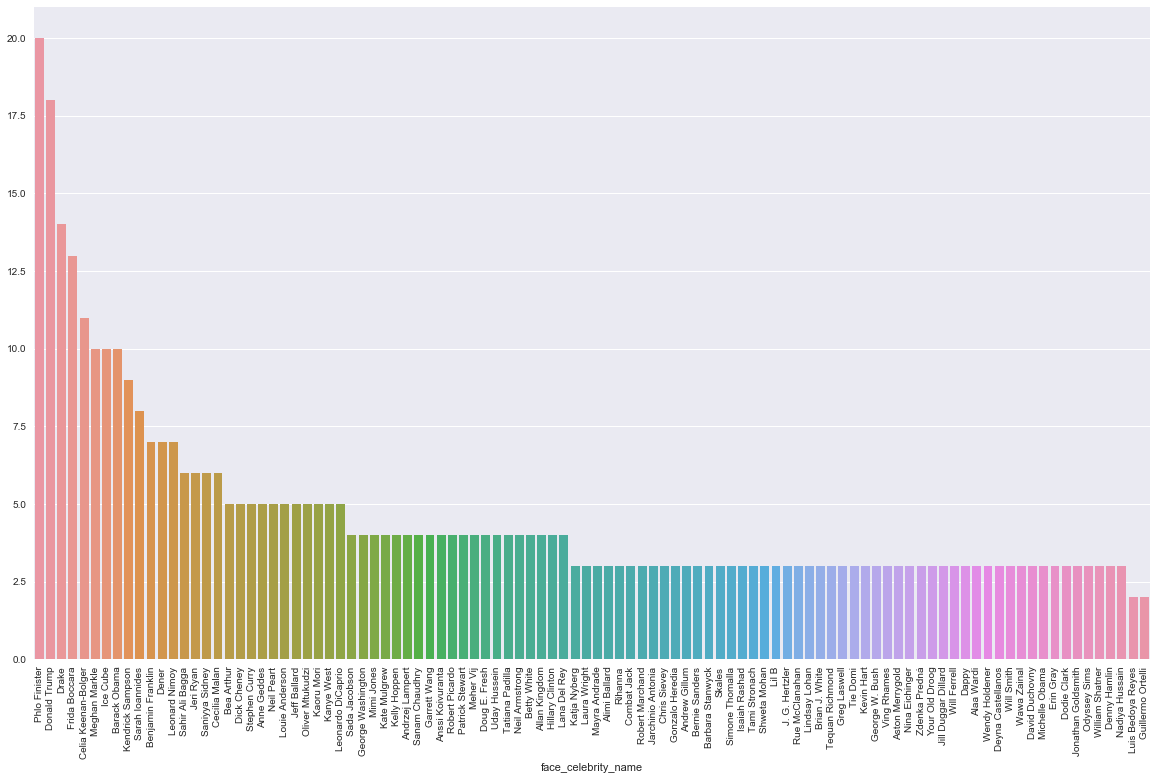

In [77]:
plt.figure(figsize=(20,12))

celeb = df_celeb.groupby('face_celebrity_name').count().image_id.sort_values(ascending=False)

sns.barplot(x=celeb.head(100).index, y=celeb.head(100).values)

plt.xticks(rotation=90)

#### Possible Features on a User Level:

* Percentage of images including a celebrity
* Top celebrity
* Average number of celebrities per image

## Faces

In [9]:
df_face.head()

,image_id,face_id,face_gender,face_gender_confidence,face_age_range_high,face_age_range_low,face_sunglasses,face_beard,face_beard_confidence,face_mustache,face_mustache_confidence,face_smile,face_smile_confidence,eyeglasses,eyeglasses_confidence,face_emo,emo_confidence
0,1003944279371027183_703978203,6.0,Female,98.741425,38.0,20.0,False,False,99.998474,False,99.999794,False,99.916168,True,95.395546,SAD,12.660271
1,1003944279371027183_703978203,6.0,Female,98.741425,38.0,20.0,False,False,99.998474,False,99.999794,False,99.916168,True,95.395546,CALM,8.252973
2,1003944279371027183_703978203,6.0,Female,98.741425,38.0,20.0,False,False,99.998474,False,99.999794,False,99.916168,True,95.395546,SURPRISED,24.634266
3,1003944279371027183_703978203,68.0,Male,99.927521,77.0,57.0,False,False,99.981598,False,99.993256,False,84.395294,True,99.420914,HAPPY,53.603287
4,1003944279371027183_703978203,68.0,Male,99.927521,77.0,57.0,False,False,99.981598,False,99.993256,False,84.395294,True,99.420914,SAD,5.509090


In [10]:
df_face.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86877 entries, 0 to 86876
Data columns (total 17 columns):
image_id                    86877 non-null object
face_id                     86877 non-null float64
face_gender                 86877 non-null object
face_gender_confidence      86877 non-null float64
face_age_range_high         86877 non-null float64
face_age_range_low          86877 non-null float64
face_sunglasses             86877 non-null bool
face_beard                  86877 non-null bool
face_beard_confidence       86877 non-null float64
face_mustache               86877 non-null bool
face_mustache_confidence    86877 non-null float64
face_smile                  86877 non-null bool
face_smile_confidence       86877 non-null float64
eyeglasses                  86877 non-null bool
eyeglasses_confidence       86877 non-null float64
face_emo                    86877 non-null object
emo_confidence              86877 non-null float64
dtypes: bool(5), float64(9), object(3)
mem

#### Possible Features on a User Level:

* Average number of faces in images
* Percentage of male faces versus percentage of female faces in images
* Percentage of faces with **face_range_high** > 0.5
* Percentage of faces with **face_range_low** > 0.5
* Percentage of faces with sunglasses
* Percentage of faces with beard / mustache
* Percentage of faces with smile
* Percentage of faces with eyelasses
* Average **face_emo**

Need to define thresholds for confidence.


## Image Data

In [11]:
df_img_data.head()

,image_id,image_link,image_url,image_height,image_width,image_filter,image_posted_time_unix,image_posted_time,data_memorability,user_id,user_full_name,user_name,user_website,user_profile_pic,user_bio,user_followed_by,user_follows,user_posted_photos
0,1316962883971761394_3468175004,https://www.instagram.com/p/BJGysPxgsTy/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Lo-fi,1471214231,14-08-2016 22:37:11,0.800521,3468175004,Leah Jenkins,leah.chelle,,https://scontent.cdninstagram.com/t51.2885-19/...,,7.0,0.0,1.0
1,552382455733335946_263042348,https://www.instagram.com/p/eqdOq2JLeK/,https://scontent.cdninstagram.com/t51.2885-15/...,612.0,612.0,Normal,1380069141,25-09-2013 00:32:21,0.875568,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
2,594552614686078174_263042348,https://www.instagram.com/p/hARnP2pLTe/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Vesper,1385096216,22-11-2013 04:56:56,0.672679,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
3,553884883234370621_263042348,https://www.instagram.com/p/evy13fpLQ9/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Amaro,1380248245,27-09-2013 02:17:25,0.843525,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
4,725551583154452417_263042348,https://www.instagram.com/p/oRrVIcJLfB/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Amaro,1400712510,21-05-2014 22:48:30,0.859796,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0


In [12]:
df_img_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41206 entries, 0 to 41205
Data columns (total 18 columns):
image_id                  41206 non-null object
image_link                41206 non-null object
image_url                 41206 non-null object
image_height              41206 non-null float64
image_width               41206 non-null float64
image_filter              41206 non-null object
image_posted_time_unix    41206 non-null object
image_posted_time         41206 non-null object
data_memorability         41071 non-null float64
user_id                   41206 non-null object
user_full_name            41206 non-null object
user_name                 41206 non-null object
user_website              41206 non-null object
user_profile_pic          41206 non-null object
user_bio                  41206 non-null object
user_followed_by          41206 non-null float64
user_follows              41206 non-null float64
user_posted_photos        41206 non-null float64
dtypes: float64(6), o

#### Possible User Level Features:

* Top filter
* Average "age" of image
* Average time of the day for **posted_time**
* Length of **user_bio**
* Number of Followers
* Number of users followed
* Number of photos

## Image Metrics

In [13]:
df_img_metrics.head()

,image_id,comment_count,comment_count_time_created,like_count,like_count_time_created
0,1337283311810249709_3041716852,0.0,19-06-2017 19:33:26,15.0,19-06-2017 19:23:26
1,1337283311810249709_3041716852,0.0,19-06-2017 19:23:26,15.0,19-06-2017 19:23:26
2,1337834353379743556_3041716852,0.0,19-06-2017 19:33:26,23.0,19-06-2017 19:23:26
3,1337834353379743556_3041716852,0.0,19-06-2017 19:23:26,23.0,19-06-2017 19:23:26
4,1516356155708878303_3041716852,5.0,19-06-2017 19:23:07,19.0,19-06-2017 19:23:07


In [14]:
df_img_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44218 entries, 0 to 44217
Data columns (total 5 columns):
image_id                      44218 non-null object
comment_count                 44218 non-null float64
comment_count_time_created    44218 non-null object
like_count                    44218 non-null float64
like_count_time_created       44218 non-null object
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


#### Possible User Level Features:

* Average **comment_count**
* Average **like_count**

## Objects

In [15]:
df_object.head()

,image_id,data_amz_label,data_amz_label_confidence
0,863479386465416946_545497348,Animal,90.163101
1,916939688871507178_545497348,Animal,83.518669
2,551681403589539797_545497348,Animal,74.837212
3,1189285646274180856_545497348,Animal,76.920967
4,962361211517974133_545497348,Animal,71.223869


In [16]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172613 entries, 0 to 172612
Data columns (total 3 columns):
image_id                     172613 non-null object
data_amz_label               172613 non-null object
data_amz_label_confidence    172613 non-null float64
dtypes: float64(1), object(2)
memory usage: 4.0+ MB


/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

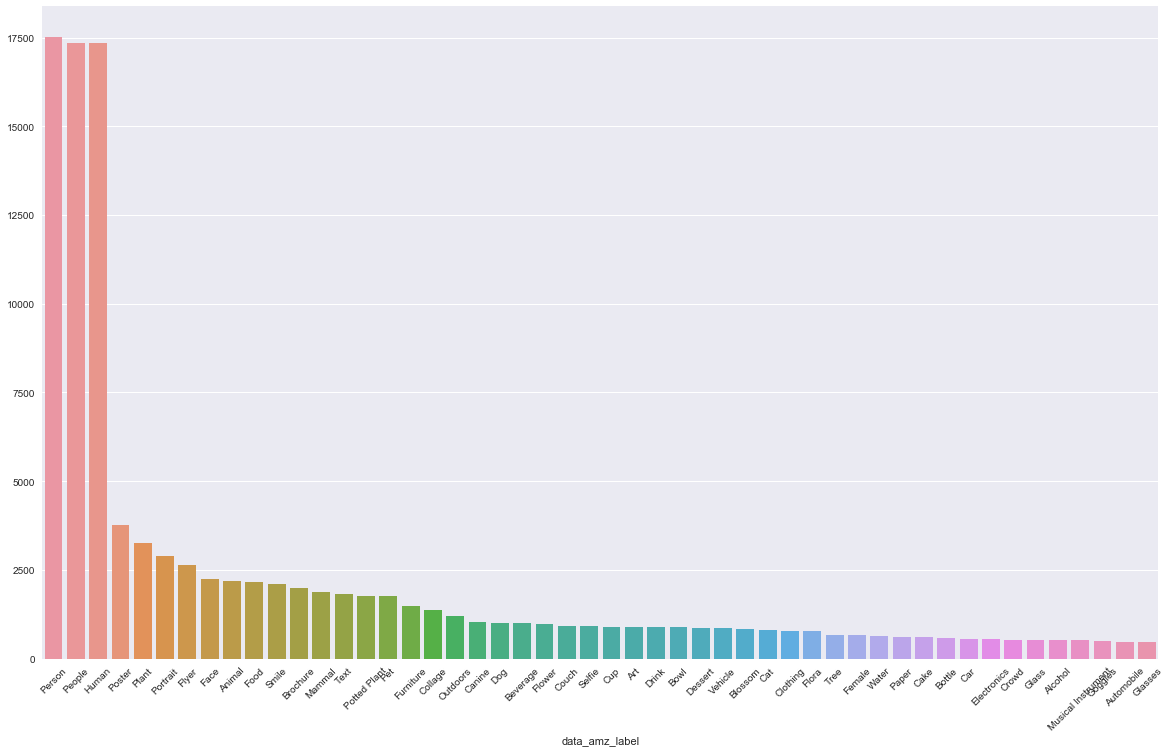

In [37]:
plt.figure(figsize=(20,12))

count = df_object.groupby('data_amz_label').count().image_id.sort_values(ascending=False).head(50)

sns.barplot(x=count.index, y=count.values)

plt.xticks(rotation=45)

In [41]:
count.iloc[:3].values.sum() / df_object.shape[0]

0.30232948850897673

30% of pictures has either a Person / People / Human

In [62]:
count = df_object.groupby('data_amz_label').count().image_id

df = pd.DataFrame(count)

df[df.image_id <= 10].shape[0]

1152

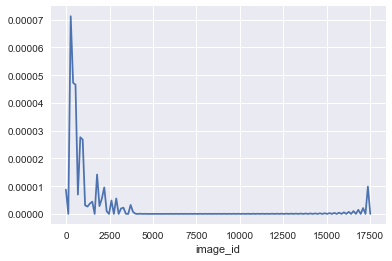

In [50]:
sns.distplot(count, hist=False)

#### Possible User Level Features:

* Number of faces / people / humans per picture


## Survey

In [17]:
df_survey.head()

,index,id,gender,born,education,employed,income,A_2,N_1,P_1,...,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount,private_account
0,0,920bf027f7d13dbdc7b66b3d3324903c,Male,1975,College graduate,Employed for wages,"$30,000 to $39,999",4,5,5,...,4.333333,4.000000,4.666667,5.000000,3.666667,4.2500,4.000000,4.333333,465.0,public
1,1,b433b2bfe49e28d0b7c45925b53084e0,Male,1978,College graduate,Employed for wages,"$20,000 to $29,999",8,0,9,...,9.000000,7.333333,9.000000,8.000000,7.666667,8.2500,0.000000,9.000000,6.0,public
2,4,f4f54676f75f47c17dc434cf68845328,Female,1990,High school graduate,Employed for wages,"$80,000 to $89,999",7,3,8,...,8.000000,7.333333,7.666667,7.666667,7.333333,7.5625,3.333333,8.000000,767.0,public
3,5,a27a5fc47a59f35761705330253a58e3,Male,1997,High school graduate,Employed for wages,"$20,000 to $29,999",7,5,7,...,6.000000,4.666667,3.666667,6.666667,5.666667,5.3750,6.000000,6.000000,43.0,public
4,6,0a1002b2232a4ecbde604462f6d84bf9,Female,1993,College graduate,A student,"$20,000 to $29,999",7,5,7,...,5.666667,6.000000,6.000000,6.666667,7.000000,NaN,3.000000,5.666667,73.0,public


In [64]:
df_survey.income.nunique()

13

In [18]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 46 columns):
index              161 non-null int64
id                 161 non-null category
gender             161 non-null category
born               161 non-null int32
education          161 non-null category
employed           161 non-null category
income             161 non-null category
A_2                161 non-null int32
N_1                161 non-null int32
P_1                161 non-null int32
E_1                161 non-null int32
A_1                161 non-null int32
H_1                161 non-null int32
M_1                161 non-null int32
R_1                161 non-null int32
M_2                161 non-null int32
E_2                161 non-null int32
LON                161 non-null int32
H_2                161 non-null int32
P_2                161 non-null int32
N_2                161 non-null int32
A_3                161 non-null int32
N_3                161 non-null int32
E_3   

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


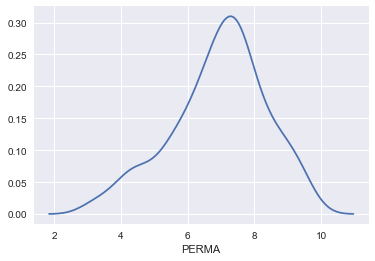

In [66]:
sns.distplot(df_survey.PERMA, hist=False)

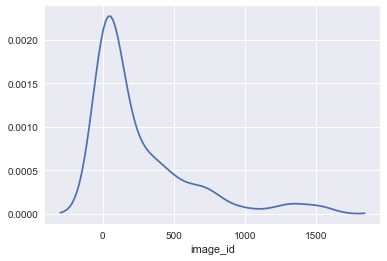

In [35]:
sns.distplot(df_img_data.groupby('user_id').count().image_id, hist=False)

### Possible Aggregated Features:

* Average Image Count per User
* Median Image Count per User
* Average Like Count per Image per User
* Median Like Count per Image per User
* Average Comment Count per Image per User
* Median Comment Count per Image per User
* Follower Count per User
* Followed Count per User

#### TODO

## Merging & Munging

* Most frequent **anp_label**
* Average **anp_sentiment**
* Average **emotion_score**
* Most frequent **emotion_label**

### Image Data

* Top filter
* Average "age" of image
* Average time of the day for posted_time
* Length of user_bio
* Number of Followers
* Number of users followed
* Number of photos

In [127]:
df_img_data = pd.read_pickle('../../data/Visual_well_being/image_data.pickle')

In [128]:
#convert object to numeric
df_img_data['user_id'] = pd.to_numeric(df_img_data['user_id'])

#binary variable (filter / no filter)
df_img_data['has_filter'] = [1 if d != 'Unknown' else 0 for d in df_img_data.image_filter]

#extract hour of the day when pic was posted
df_img_data['time_of_day'] = pd.to_datetime(df_img_data.image_posted_time).dt.hour

In [129]:
df_img_user = pd.merge(df_survey.loc[:, ['id', 'insta_user_id']], df_img_data, left_on='insta_user_id', right_on='user_id')

In [130]:
df_merge = pd.merge(df_survey, df_img_user.groupby('user_id').mean().reset_index(), on='insta_user_id')

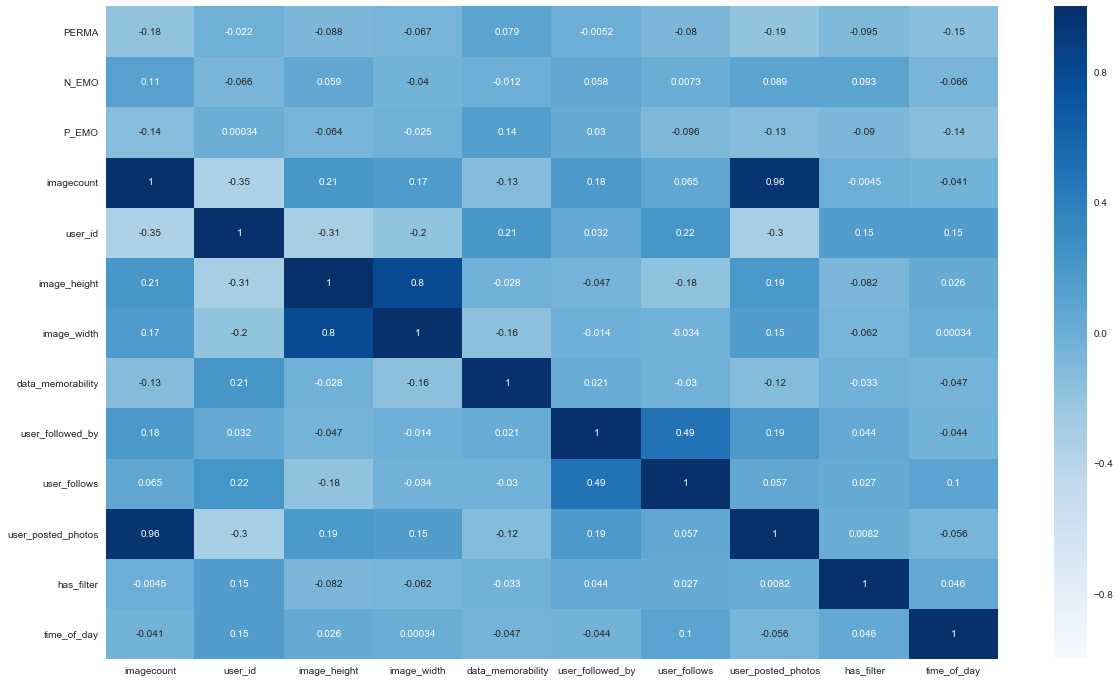

In [131]:
plt.figure(figsize=(20,12))

sns.heatmap(df_merge.corr().iloc[34:].transpose().loc['PERMA':,:], cmap='Blues', annot=True)

### Image Metrics

In [135]:
df_metrics_merged = pd.merge(df_img_metrics, df_img_user, on='image_id')

In [141]:
df_merge = pd.merge(df_merge, df_metrics_merged.groupby('user_id').mean().reset_index(), on='user_id')

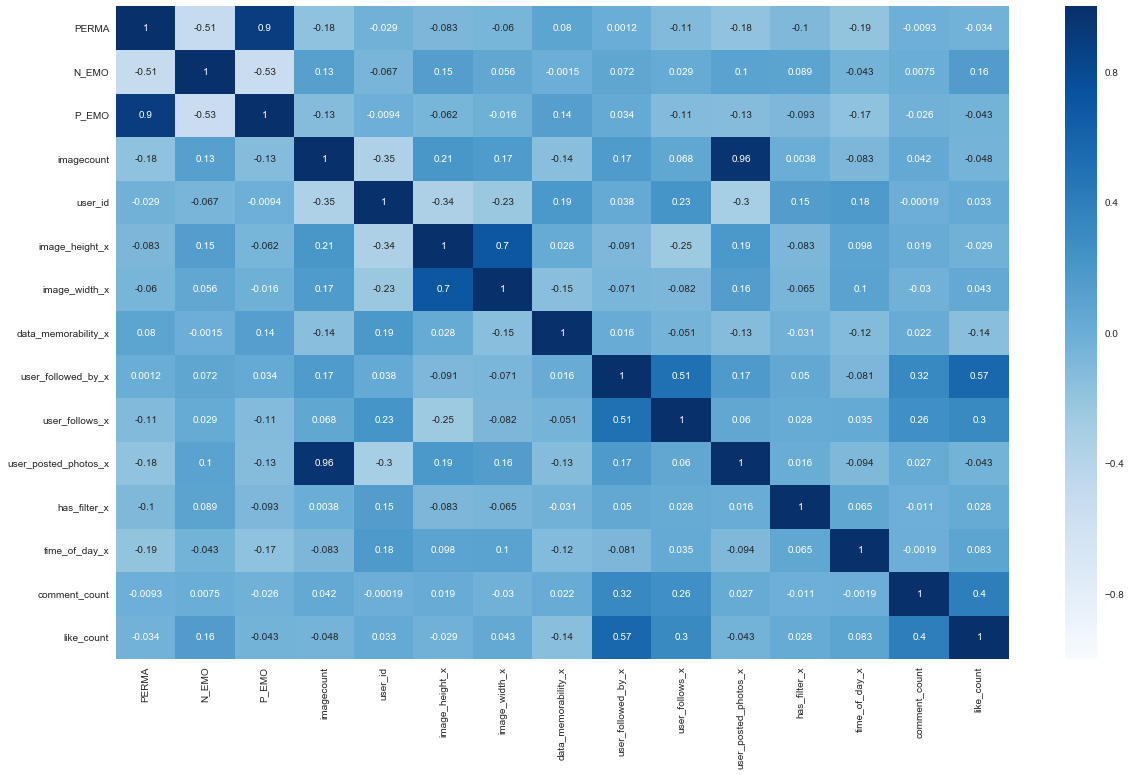

In [149]:
plt.figure(figsize=(20,12))

sns.heatmap(df_merge.corr().loc['PERMA':,:].loc[:'like_count', :].transpose().loc['PERMA':,:].loc[:'like_count', :], cmap='Blues', annot=True)

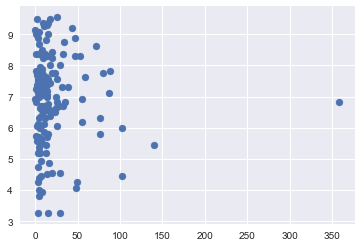

In [150]:
plt.scatter(df_merge.like_count, df_merge.PERMA)

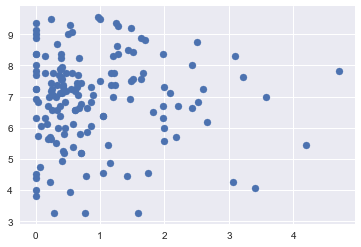

In [151]:
plt.scatter(df_merge.comment_count, df_merge.PERMA)

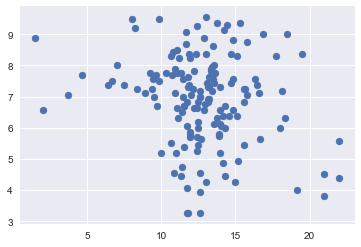

In [152]:
plt.scatter(df_merge.time_of_day_x, df_merge.PERMA)